<a href="https://colab.research.google.com/github/prepstation09/SeaLevel_Predictor/blob/main/catsVsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 123MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.7MB/s]


In [4]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generaators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [8]:
# create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 107ms/step - loss: 1.1915 - accuracy: 0.5583 - val_loss: 0.6617 - val_accuracy: 0.6012
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6543 - accuracy: 0.6183 - val_loss: 0.6195 - val_accuracy: 0.6564
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6423 - accuracy: 0.6436 - val_loss: 0.6115 - val_accuracy: 0.6350
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5733 - accuracy: 0.6991 - val_loss: 0.5957 - val_accuracy: 0.6496
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5304 - accuracy: 0.7364 - val_loss: 0.6388 - val_accuracy: 0.7264
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4853 - accuracy: 0.7675 - val_loss: 0.5001 - val_accuracy: 0.7586
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4365 - accuracy: 0.8009 - val_loss: 0.4702 - val_ac

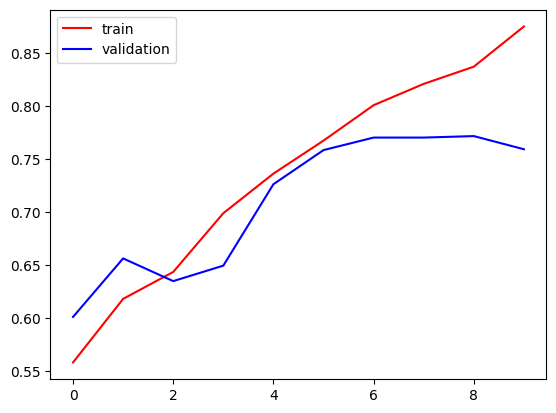

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

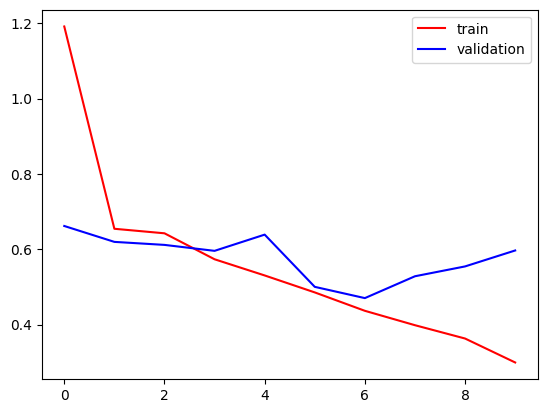

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [15]:
test_img=cv2.imread('/content/dog.webp')


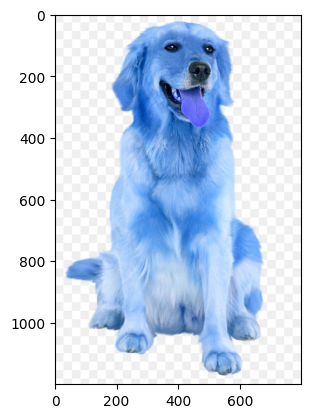

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(1200, 800, 3)

In [18]:
test_img=cv2.resize(test_img,(256,256))

In [19]:
test_input=test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 [==============================] - 0s 413ms/step


array([[0.9914737]], dtype=float32)

In [21]:
import cv2

In [22]:
test_img=cv2.imread('/content/cat.jpg')

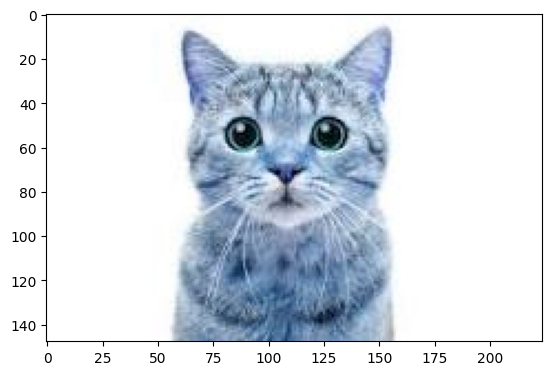

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(148, 224, 3)

In [25]:
test_img=cv2.resize(test_img,(256,256))

In [26]:
test_input=test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[0.995167]], dtype=float32)